# 逻辑回归代码示例

## 1. 导入必要的库

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## 2. 生成模拟数据
使用NumPy的`random.randn()`函数生成一个随机数组X
`np.random.randn(200, 2)` 生成一个形状为(200, 2)的二维数组, 200表示有200个样本，2表示每个样本有2个特征,生成的随机数服从标准正态分布（均值为0，标准差为1）
1. X[:, 0] + X[:, 1] > 0 创建一个布尔数组，当 X 的第一列和第二列之和大于 0 时为 True，否则为 False
2. .astype(int) 将布尔值转换为整数，True 变为 1，False 变为 0
因此，当 X 的前两个特征之和大于 0 时，对应的 y 值为 1，否则为 0

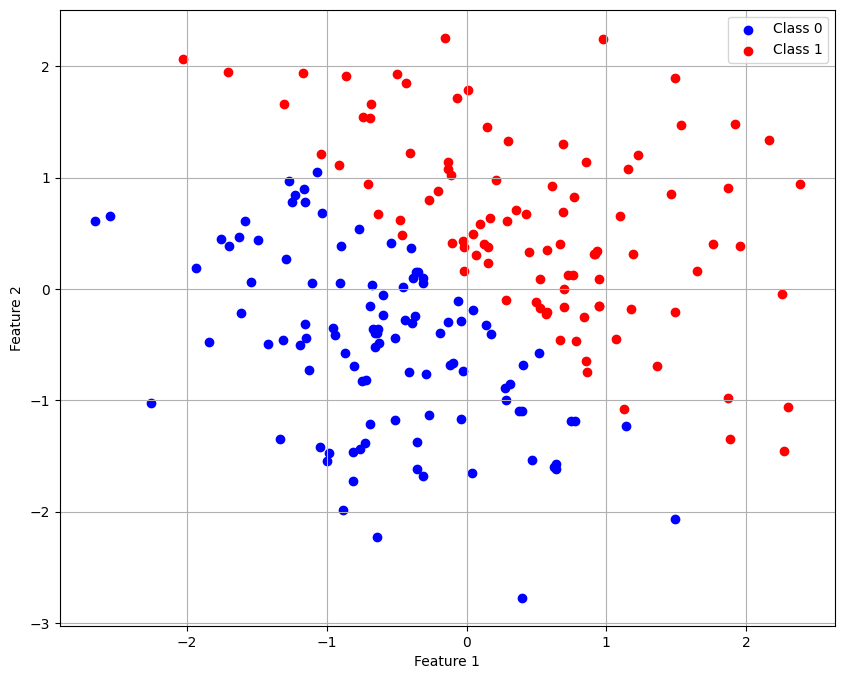

In [10]:
# 生成模拟数据
np.random.seed(0)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# 可视化数据
plt.figure(figsize=(10, 8))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], c='blue', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
loajsdfo

## 3. 分割数据集


In [15]:
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
print(X_test.size)
print(y_train.size)

120
140


## 4. 创建并训练模型
我们创建一个逻辑回归模型并使用训练数据进行拟合。

In [19]:
# 创建并训练模型
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## 5. 预测和计算准确率
使用训练好的模型进行预测,并计算模型的准确率。

In [22]:
# 预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率: {accuracy:.2f}")

准确率: 0.98


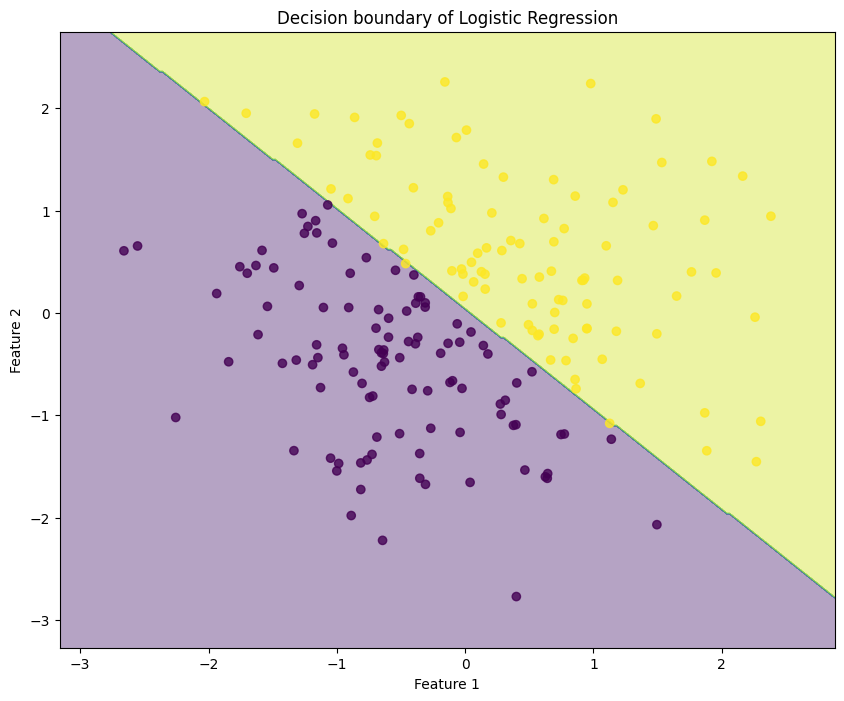

In [24]:
# 绘制决策边界
plt.figure(figsize=(10, 8))
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision boundary of Logistic Regression")
plt.show()

#### 问题：`Sigma`函数，去哪里了？

在本页的代码中，Sigmoid函数的作用主要体现在LogisticRegression模型的内部实现中。虽然我们没有直接看到Sigmoid函数的代码，但它在逻辑回归的核心过程中起着关键作用。

Sigmoid函数的主要作用是将线性组合的结果转换为0到1之间的概率值。在逻辑回归中，它用于：

1. 将线性预测转换为概率：z = w * x + b 转换为 p = 1 / (1 + e^(-z))
2. 提供可微分的非线性激活，便于梯度下降优化

在我们的代码中，Sigmoid函数的应用隐含在以下部分：

1. 模型训练：
   ```python
   model = LogisticRegression()
   model.fit(X_train, y_train)
   ```
   在fit过程中，模型内部使用Sigmoid函数来计算预测概率。

2. 预测：
   ```python
   y_pred = model.predict(X_test)
   ```
   predict方法内部首先计算概率（使用Sigmoid函数），然后根据阈值（通常是0.5）确定类别。

3. 决策边界可视化：
   ```python
   Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
   ```
   这里的predict同样涉及Sigmoid函数，用于确定每个网格点的类别。

虽然我们没有直接实现Sigmoid函数，但它是LogisticRegression类内部实现的核心组成部分，在模型训练和预测过程中发挥着重要作用。


#### 混淆矩阵解释

混淆矩阵是评估分类模型性能的重要工具。对于二分类问题，它通常是一个2x2的矩阵：

[[TN, FP],
 [FN, TP]]

其中：
- TN (True Negative): 正确预测为负类的样本数
- FP (False Positive): 错误预测为正类的负类样本数
- FN (False Negative): 错误预测为负类的正类样本数
- TP (True Positive): 正确预测为正类的样本数

例如，如果混淆矩阵为：
[[50, 10],
 [5,  35]]

这表示：
- 50个负类样本被正确分类
- 10个负类样本被错误地分类为正类
- 5个正类样本被错误地分类为负类
- 35个正类样本被正确分类

通过混淆矩阵，我们可以计算多个重要指标：
1. 准确率 = (TP + TN) / (TP + TN + FP + FN)
2. 精确率 = TP / (TP + FP)
3. 召回率 = TP / (TP + FN)
4. F1分数 = 2 * (精确率 * 召回率) / (精确率 + 召回率)

这些指标有助于全面评估模型的性能，特别是在类别不平衡的情况下。


In [26]:
# 打印混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print("混淆矩阵:")
print(conf_matrix)

混淆矩阵:
[[34  0]
 [ 1 25]]
